To run this sample, from the *Cell* menu above, click *Run All*.

In [1]:
%matplotlib notebook

<IPython.core.display.Javascript object>


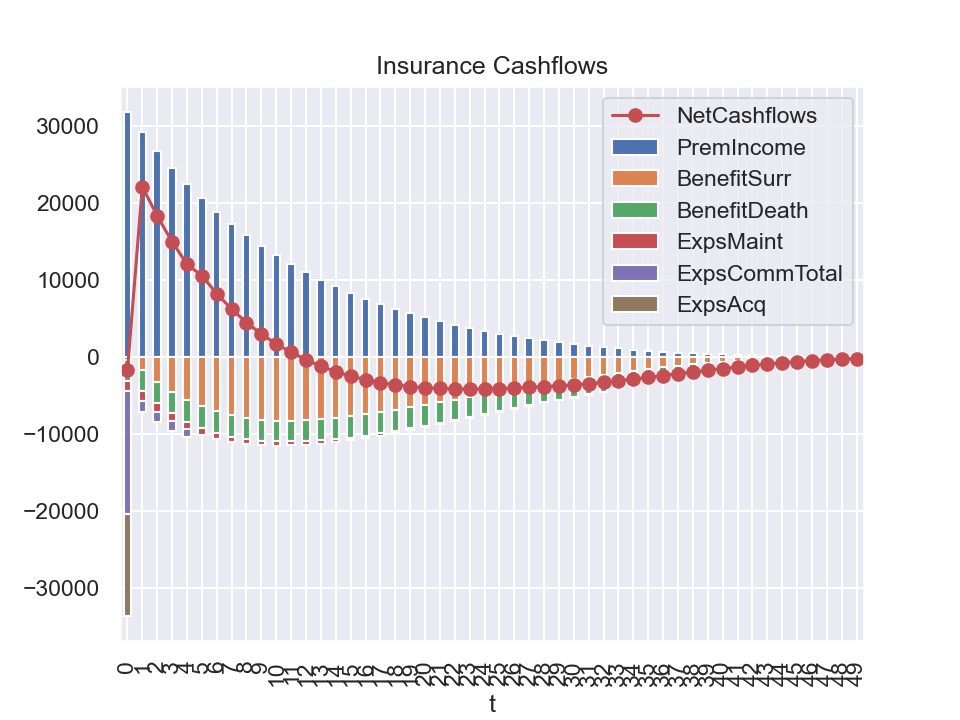

<AxesSubplot:title={'center':'Insurance Cashflows'}, xlabel='t'>

In [2]:
"""
:mod:`simplelife` cashflow
==========================

Draw a graph of liability cashflows of a simple whole life policy

*Run this sample now!* |binder simplelife_demo|

.. include:: /banners.rst
   :start-after: Begin binder simplelife_demo
   :end-before: End binder simplelife_demo

"""
import os
import modelx as mx
import pandas as pd
import seaborn as sns
sns.set()

polid = 171
proj = mx.read_model('model').Projection[polid]

# %% Draw NetCashflows Graph
data = {'NetCashflows': [proj.NetInsurCF[t] for t in range(50)]}
ax = pd.DataFrame(data).plot.line(marker='o', color='r')

# %% Draw componets of net cashflows

vars = ['PremIncome',
        'BenefitSurr',
        'BenefitDeath',
        'ExpsMaint',
        'ExpsCommTotal',
        'ExpsAcq']


df = proj.cells[vars].to_frame(range(50))

df[vars[1:]] = df[vars[1:]].mul(-1)   # Change outflows to negatives
df.plot(kind='bar', stacked=True, ax=ax, title='Insurance Cashflows')